In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import numpy as np
import random

font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv('./car.csv', encoding='cp949')

df = df.T
df.reset_index(inplace=True)
df.columns = df.iloc[0].to_list()
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)

for i in df.columns.to_list():
    if i == '구분' : pass
    else: 
        df[i] = df[i].astype(int)

df['구분'] = pd.to_datetime(df['구분'])

df['year'] = df['구분'].dt.year

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   구분      132 non-null    datetime64[ns]
 1   중구      132 non-null    int32         
 2   남구      132 non-null    int32         
 3   동구      132 non-null    int32         
 4   북구      132 non-null    int32         
 5   서구      132 non-null    int32         
 6   달서구     132 non-null    int32         
 7   달성군     132 non-null    int32         
 8   수성구     132 non-null    int32         
 9   year    132 non-null    int64         
dtypes: datetime64[ns](1), int32(8), int64(1)
memory usage: 6.3 KB


In [5]:
grouped_year = df.groupby(['year'])
result = grouped_year.sum().reset_index()
result = result.T
result.columns = result.iloc[0].to_list()
result.drop(index='year', inplace=True)
result.reset_index(inplace=True)
result.columns = ['구분'] + result.columns.to_list()[1:]
result

C:\Users\a\AppData\Local\Temp\ipykernel_11848\961071075.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = grouped_year.sum().reset_index()


,구분,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,중구,582766,616490,684333,754911,740145,697119,691135,682947,748132,767265,739673
1,남구,693865,704736,709884,714291,707700,703373,702350,693650,694177,696223,689213
2,동구,1597821,1644295,1714747,1786674,1846771,1882439,1924686,1944227,1960576,1989924,2022255
3,북구,2130155,2158571,2196381,2254544,2306792,2358636,2412473,2442497,2482844,2522153,2545050
4,서구,919955,937884,955378,962254,970928,962165,942790,907289,884310,873836,871613
5,달서구,2862276,2923673,2996124,3081391,3150410,3217727,3258085,3324216,3409368,3433034,3469169
6,달성군,938153,969686,1004829,1067052,1202066,1384990,1518890,1590263,1638501,1690047,1724225
7,수성구,2243781,2361553,2436499,2477407,2508769,2551862,2579209,2616697,2640412,2610591,2596244


C:\Users\a\AppData\Local\Temp\ipykernel_11848\3181238381.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_year.mean()


,중구,남구,동구,북구,서구,달서구,달성군,수성구
year,,,,,,,,
2012,48563.833333,57822.083333,133151.750000,177512.916667,76662.916667,238523.000000,78179.416667,186981.750000
2013,51374.166667,58728.000000,137024.583333,179880.916667,78157.000000,243639.416667,80807.166667,196796.083333
2014,57027.750000,59157.000000,142895.583333,183031.750000,79614.833333,249677.000000,83735.750000,203041.583333
2015,62909.250000,59524.250000,148889.500000,187878.666667,80187.833333,256782.583333,88921.000000,206450.583333
2016,61678.750000,58975.000000,153897.583333,192232.666667,80910.666667,262534.166667,100172.166667,209064.083333
2017,58093.250000,58614.416667,156869.916667,196553.000000,80180.416667,268143.916667,115415.833333,212655.166667
2018,57594.583333,58529.166667,160390.500000,201039.416667,78565.833333,271507.083333,126574.166667,214934.083333
2019,56912.250000,57804.166667,162018.916667,203541.416667,75607.416667,277018.000000,132521.916667,218058.083333
2020,62344.333333,57848.083333,163381.333333,206903.666667,73692.500000,284114.000000,136541.750000,220034.333333


In [7]:
melt_df = result.copy()

melt_df = melt_df.melt(id_vars='구분', value_vars=melt_df.columns[1:], var_name='year', value_name='등록자동차수 합계')
melt_df

,구분,year,등록자동차수 합계
0,중구,2012,582766
1,남구,2012,693865
2,동구,2012,1597821
3,북구,2012,2130155
4,서구,2012,919955
...,...,...,...
83,북구,2022,2545050
84,서구,2022,871613
85,달서구,2022,3469169
86,달성군,2022,1724225


Text(0, 1, '자동차 등록대수(백만 대)')

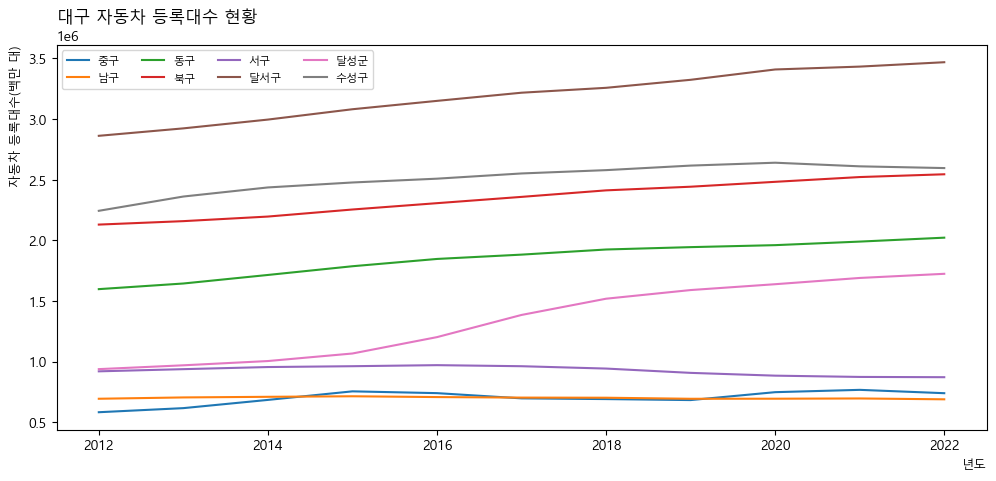

In [60]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,1,1)

sns.lineplot(data=melt_df, x='year', y='등록자동차수 합계', hue='구분', ax=ax1)
plt.title('대구 자동차 등록대수 현황', fontsize=12, loc='left')
plt.legend(fontsize=8, ncol=4, loc='upper left')
ax1.set_xlabel('년도', loc='right', fontsize=9)
ax1.set_ylabel('자동차 등록대수(백만 대)', loc='top', fontsize=9)

In [9]:
result

,구분,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,중구,582766,616490,684333,754911,740145,697119,691135,682947,748132,767265,739673
1,남구,693865,704736,709884,714291,707700,703373,702350,693650,694177,696223,689213
2,동구,1597821,1644295,1714747,1786674,1846771,1882439,1924686,1944227,1960576,1989924,2022255
3,북구,2130155,2158571,2196381,2254544,2306792,2358636,2412473,2442497,2482844,2522153,2545050
4,서구,919955,937884,955378,962254,970928,962165,942790,907289,884310,873836,871613
5,달서구,2862276,2923673,2996124,3081391,3150410,3217727,3258085,3324216,3409368,3433034,3469169
6,달성군,938153,969686,1004829,1067052,1202066,1384990,1518890,1590263,1638501,1690047,1724225
7,수성구,2243781,2361553,2436499,2477407,2508769,2551862,2579209,2616697,2640412,2610591,2596244


In [10]:
result = result.set_index('구분')
result

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
구분,,,,,,,,,,,
중구,582766,616490,684333,754911,740145,697119,691135,682947,748132,767265,739673
남구,693865,704736,709884,714291,707700,703373,702350,693650,694177,696223,689213
동구,1597821,1644295,1714747,1786674,1846771,1882439,1924686,1944227,1960576,1989924,2022255
북구,2130155,2158571,2196381,2254544,2306792,2358636,2412473,2442497,2482844,2522153,2545050
서구,919955,937884,955378,962254,970928,962165,942790,907289,884310,873836,871613
달서구,2862276,2923673,2996124,3081391,3150410,3217727,3258085,3324216,3409368,3433034,3469169
달성군,938153,969686,1004829,1067052,1202066,1384990,1518890,1590263,1638501,1690047,1724225
수성구,2243781,2361553,2436499,2477407,2508769,2551862,2579209,2616697,2640412,2610591,2596244


In [43]:
df2 = pd.DataFrame(df.mean().round(2))

df2.columns = ['지역별 평균']
df2.drop(index='year', inplace=True)
df2

C:\Users\a\AppData\Local\Temp\ipykernel_11848\2552700633.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df2 = pd.DataFrame(df.mean().round(2))


,지역별 평균
중구,58370.58
남구,58405.02
동구,153897.08
북구,195531.03
서구,77184.86
달서구,266102.07
달성군,111581.08
수성구,209265.33


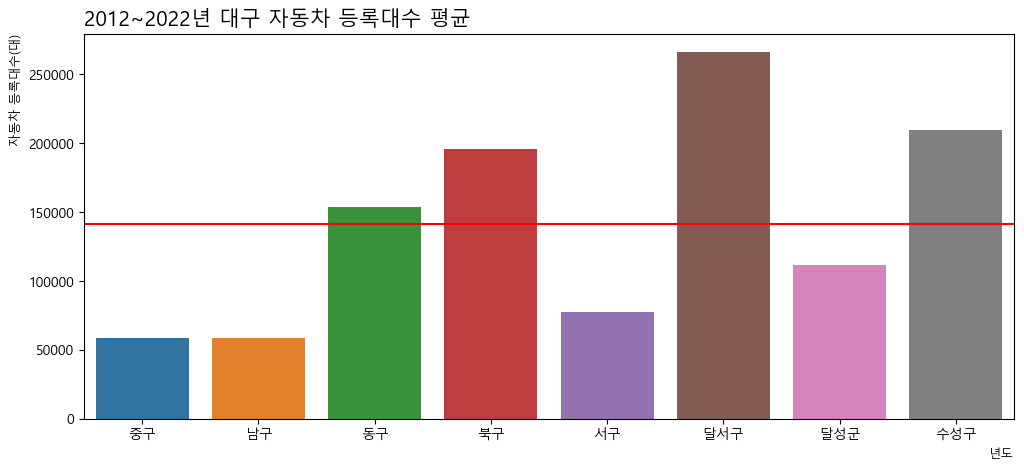

In [61]:
line_num = int(df2.mean())

fig2 = plt.figure(figsize=(12,5))
ax2 = fig2.add_subplot(1,1,1)

sns.barplot(data=df2, x=df2.index, y='지역별 평균', ax=ax2)

plt.title('2012~2022년 대구 자동차 등록대수 평균', fontsize=15, loc='left')
ax2.set_xlabel('년도', loc='right', fontsize=9)
ax2.set_ylabel('자동차 등록대수(대)', loc='top', fontsize=9)
plt.axhline(y=line_num, color='red', linewidth=1.5)